In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/game_of_thrones_deaths_collecti.csv')
df.head(10)

,name,allegiance,season,episode,location,killer,killers_house,method,death_no
0,Waymar Royce,Night's Watch,1,1,Beyond the Wall,White Walker,NaN,Ice sword,1
1,Gared,Night's Watch,1,1,Beyond the Wall,White Walker,NaN,Ice sword,2
2,Will,Night's Watch,1,1,Winterfell,Ned Stark,House Stark,Sword,3
3,Stag,NaN,1,1,Winterfell,Direwolf,NaN,Teeth,4
4,Direwolf,NaN,1,1,Winterfell,Stag,NaN,Antler,5
5,Jon Arryn,House Arryn,1,1,King's Landing,Lysa Arryn,House Arryn,Poison,6
6,Dothraki man,Dothraki,1,1,Pentos,Dothraki man,Dothraki,Arakh,7
7,Catspaw assassin,NaN,1,2,Winterfell,Summer,House Stark,Teeth,8
8,Mycah,Smallfolk,1,2,Kingsroad,"Sandor ""the Hound"" Clegane",House Lannister,Sword,9
9,Lady,House Stark,1,2,Kingsroad,Ned Stark,House Stark,Knife,10


Estos datos contienen todos los asesintos que han sucedido en Juego de Tronos en cada temporada.
name: Nombre de la victima
allegiance: La alianza de la victima
season: Temporada
episode: Número de episodio
location: Lugar del asesinato
killer: El asesino
killer_house: Casa a la que pertenece el asesino
method: Tipo de asesinato
death_no: El número de muerte en la serie

Necesito saber los datos con NaN
Si son datos string, los ponemos como Desconocido
Si son datos numéricos los ponemos como 0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2224 non-null   object
 1   allegiance     1792 non-null   object
 2   season         2224 non-null   int64 
 3   episode        2224 non-null   int64 
 4   location       2224 non-null   object
 5   killer         2214 non-null   object
 6   killers_house  2194 non-null   object
 7   method         2224 non-null   object
 8   death_no       2224 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 156.5+ KB


In [7]:
df = df.fillna({"allegiance": 'Desconocido', "killers_house": "Desconocido", "killer": "Desconocido"})
df.count()

name             2224
allegiance       2224
season           2224
episode          2224
location         2224
killer           2224
killers_house    2224
method           2224
death_no         2224
dtype: int64

Me gustaría saber el número de muertes totales y también saber el número de muertes que hubo en la primera temporada.

In [8]:
total_muertes = df.shape[0]
muertes_temp1 = df[ df.season == 1].shape[0]
print(f"Total de muertes {total_muertes}")
print(f"Muertes en la primera temporada: {muertes_temp1}")

Total de muertes 2224
Muertes en la primera temporada: 58


También quiero saber el impacto de muertes (porcentaje) de la temporada 1 respecto al conjunto de asesinatos.

In [14]:
impacto_temp1 = round((muertes_temp1/total_muertes) * 100, 2)
print(f"El impacto de la temporada 1 fue de : {impacto_temp1}")

El impacto de la temporada 1 fue de : 2.61


Necesito recuperar los datos de muertes también de la temporada 2 y 3, el impacto en la serie (porcentaje) y realizar un diccionario y ponerlo en un DataFrame nuevo

In [16]:
muertes_temp2 = df.query("season == 2").shape[0]
muertes_temp3 = len(df.query("season == 3"))
impacto_temp2 = round(muertes_temp2/total_muertes * 100, 2)
impacto_temp3 = round(muertes_temp3/total_muertes * 100, 2)
print(f"Impacto temporada 2: {impacto_temp2}")
print(f"Impacto temporada 3: {impacto_temp3}")
data = {'Temporada': ['Temporada 1', 'Temporada 2', 'Temporada 3']
        , 'Impacto serie': [impacto_temp1, impacto_temp2, impacto_temp3]}
df_impactos = pd.DataFrame.from_dict(data)
df_impactos

Impacto temporada 2: 5.85
Impacto temporada 3: 3.87


,Temporada,Impacto serie
0,Temporada 1,2.61
1,Temporada 2,5.85
2,Temporada 3,3.87


Realizar un gráfico para visualizar las temporadas

<Axes: xlabel='Temporada'>

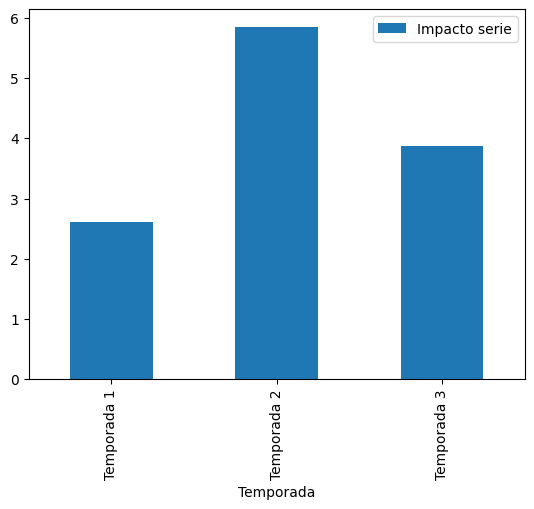

In [ ]:
df_impactos.plot(kind="bar", x="Temporada", y="Impacto serie")

No me creo estos datos, Python no es tan listo
Me gustaría visualizar el número de muertes por temporada
Agrupar el número de muertes por temporada

In [35]:
grupo_season = df.groupby('season')['name']
grupo_season.describe()

,count,unique,top,freq
season,,,,
1,58,37,Stark soldier,12
2,130,40,Baratheon of Dragonstone soldier,55
3,86,30,Stark soldier,27
4,170,43,Wildling,61
5,158,36,Sons of the Harpy agent,67
6,396,53,King's Landing Noble,138
7,334,20,Lannister soldier,204
8,892,29,Golden Company soldier,374


Agrupamos un Dataframe por asesino

In [26]:
df_killer = df.groupby('killer').sum()
df_killer


,name,allegiance,season,episode,location,killers_house,method,death_no
killer,,,,,,,,
Accident,Baratheon of Dragonstone soldier,House Baratheon of Dragonstone,2,9,King's Landing,Unknown,Blunt object,120
Aemon Targaryen,Aemon Targaryen,Night's Watch,5,7,Castle Black,Night's Watch,Old Age,511
Alliser Thorne,WildlingThenn raiderWildling,Free FolkFree FolkFree Folk,12,27,Castle BlackCastle BlackCastle Black,Night's WatchNight's WatchNight's Watch,SwordSwordSword,1089
Amory Lorch,Yoren,Night's Watch,2,3,Riverlands,House Lannister,Sword,72
Arthur Dayne,Stark soldierStark soldierStark soldier,House StarkHouse StarkHouse Stark,18,9,DorneDorneDorne,House TargaryenHouse TargaryenHouse Targaryen,SwordSwordSword,1863
...,...,...,...,...,...,...,...,...
Wildling giant,Night's Watch brotherGrenn,Night's WatchNight's Watch,8,18,The WallCastle Black,Free FolkFree Folk,Giant arrowUnknown,760
Wun Wun,Night's Watch brotherBolton soldierBolton soldier,Night's WatchHouse BoltonHouse Bolton,18,20,Castle BlackWinterfellWinterfell,Free FolkFree FolkFree Folk,HandsHandsHands,2124
Yara Greyjoy,Bolton soldierBolton soldierBolton soldierGrey...,House BoltonHouse BoltonHouse BoltonHouse Grey...,68,34,DreadfortDreadfortDreadfortThe Narrow SeaThe N...,House GreyjoyHouse GreyjoyHouse GreyjoyHouse G...,AxeAxeAxeSwordSwordSwordSwordSwordSwordSwordSword,9482


Me gustaría visualizar El asesino y el número de muertes

In [27]:
df_killer = df.groupby('killer')['death_no'].agg(['count'])
df_killer

,count
killer,
Accident,1
Aemon Targaryen,1
Alliser Thorne,3
Amory Lorch,1
Arthur Dayne,3
...,...
Wildling giant,2
Wun Wun,3
Yara Greyjoy,11


Mostrar un gráfico Pie con los 10 primeros asesinos 

<Axes: ylabel='count'>

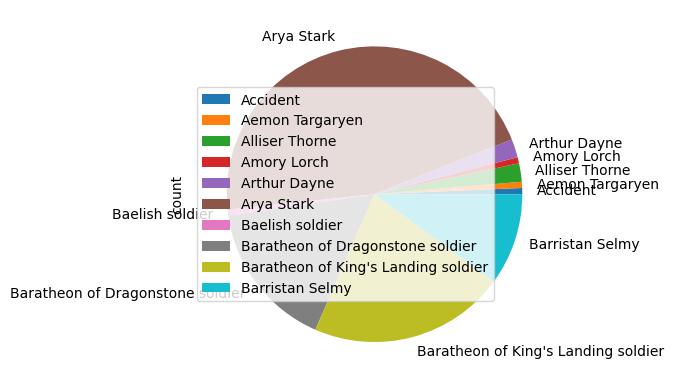

In [33]:
df_primeros = df_killer.head(10)
df_primeros.groupby('killer').sum().plot(kind='pie', y='count')

1) Queremos saber (print) el número de muertes de Daenerys Targaryen
2) Mostrar las muertes de Daenerys Targaryen en un DataFrame
3) Visualizar las muertes de Daenerys Targaryen por temporada
4) Mostrar la evolución de nuestra asesina por temporada en un gráfico de barras

In [37]:
total_muertes = df.shape[0]
muertes_dae = df[ df.killer == 'Daenerys Targaryen'].shape[0]
print(f"Total de muertes {total_muertes}")
print(f"Muertes de Daenerys Targaryen: {muertes_dae}")

Total de muertes 2224
Muertes de Daenerys Targaryen: 1008
